In [128]:
import numpy as np
import pandas as pd

In [129]:
df = pd.read_csv('spam.csv',encoding = 'latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2463,ham,"Good afternoon, babe. How goes that day ? Any ...",NaN,NaN,NaN
120,spam,URGENT! Your Mobile No. was awarded å£2000 Bon...,NaN,NaN,NaN
1723,ham,"Hi Jon, Pete here, Ive bin 2 Spain recently & ...",NaN,NaN,NaN
1262,spam,"Hungry gay guys feeling hungry and up 4 it, no...",NaN,NaN,NaN
5288,ham,An excellent thought by a misundrstud frnd: I ...,NaN,NaN,NaN


In [130]:
df.shape

(5572, 5)

In [97]:
#1. Data Cleaning
#2. EDA
#3. Text preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

# 1.Data Cleaning

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [132]:
#drop last 3 columns
df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1)

In [133]:
df.sample(5)

,v1,v2
5371,ham,"Lol, oh you got a friend for the dog ?"
4028,ham,"[Û_] anyway, many good evenings to u! s"
3844,ham,Mmmm.... I cant wait to lick it!
752,ham,Dont gimme that lip caveboy
1309,ham,"Ok, be careful ! Don't text and drive !"


In [134]:
#renaming the columns
df.rename(columns={'v1':'label','v2':'text'},inplace=True)
df.sample(5)

,label,text
756,ham,Cant think of anyone with * spare room off * t...
4982,ham,Networking job is there.
4117,ham,Watch lor. I saw a few swatch one i thk quite ...
3864,ham,"THATåÕS ALRITE GIRL, U KNOW GAIL IS NEVA WRONG..."
3619,ham,I meant as an apology from me for texting you ...


In [135]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [136]:
df['label'] = encoder.fit_transform(df['label'])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [137]:
#check missing values
df.isnull().sum()

label    0
text     0
dtype: int64

In [138]:
#check duplicate values
df.duplicated().sum()

403

In [139]:
df = df.drop_duplicates(keep = 'first')

In [140]:
df.duplicated().sum()

0

In [141]:
df.shape

(5169, 2)

# 2.EDA

In [142]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

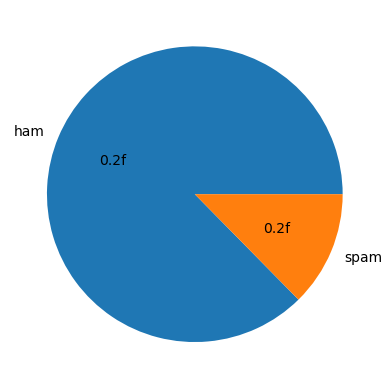

In [143]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels = ['ham','spam'],autopct = "0.2f")
plt.show()

In [76]:
# Data is slightly imbalanced as percentage of ham is much more than spam
!pip install nltk

In [77]:
import nltk

In [78]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [144]:
df['num_characters'] = df['text'].apply(len)

In [145]:
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [150]:
# Number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [147]:
df.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [149]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [152]:
df.head()

,label,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [154]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [156]:
# ham Messages
df[df['label']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [157]:
# Spam Messages
df[df['label']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [159]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

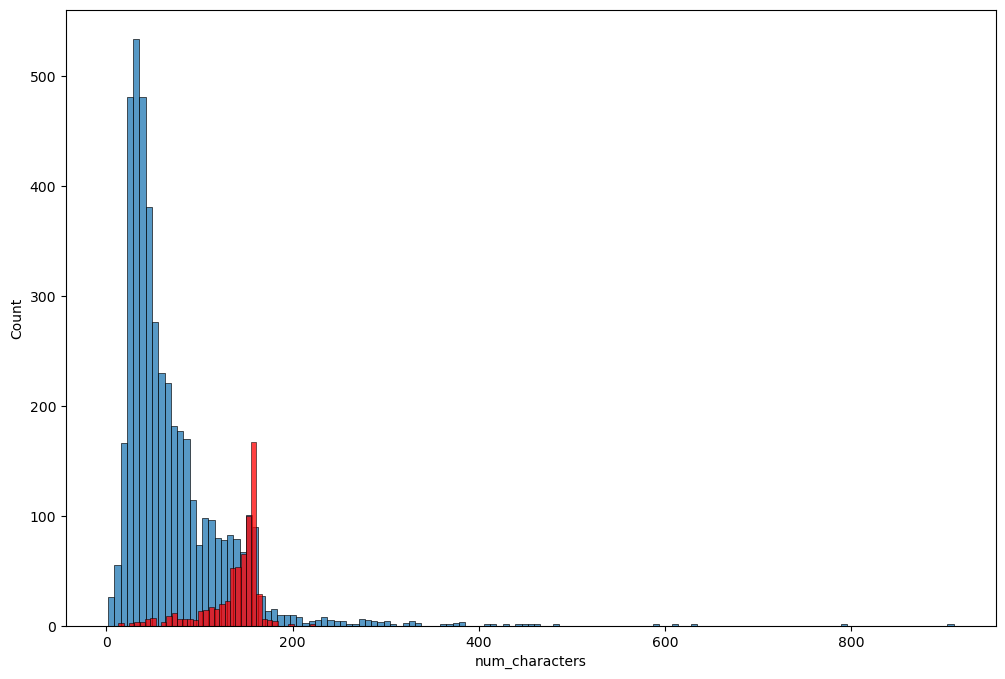

In [169]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color = 'red')

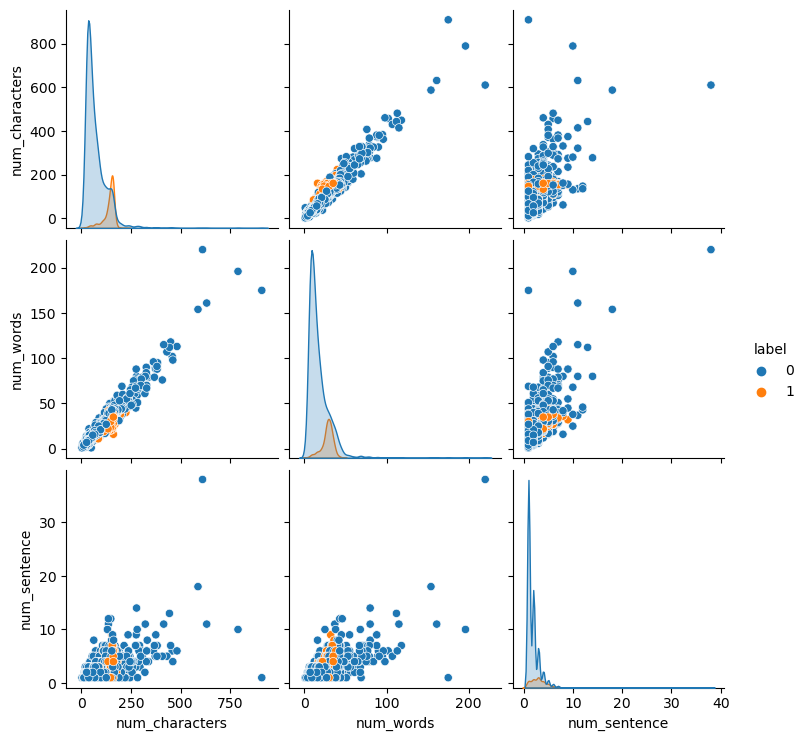

In [171]:
sns.pairplot(df,hue = 'label')

In [172]:
df.corr()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9024\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,label,num_characters,num_words,num_sentence
label,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9024\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

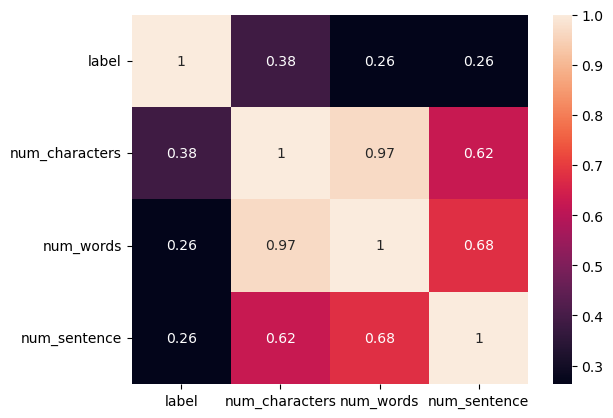

In [173]:
sns.heatmap(df.corr(), annot = True)

# 3. DATA PREPROCESSING
Lower Case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming


In [205]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [206]:
transform_text('I started liking Machine learning projects and developing them')

'start like machin learn project develop'

In [194]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [195]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [200]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [207]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [209]:
df['transformed_text']=df['text'].apply(transform_text)

In [210]:
df.head()

,label,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [213]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ----------- --------------------------- 92.2/300.2 kB 751.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 595.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 602.4 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 734.2 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 734.2 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/300.2 kB 741.6 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 706.2 kB/s eta 0:00:01
   ----------

In [223]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height = 500, min_font_size=10,background_color='white')

In [224]:
spam_wc = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

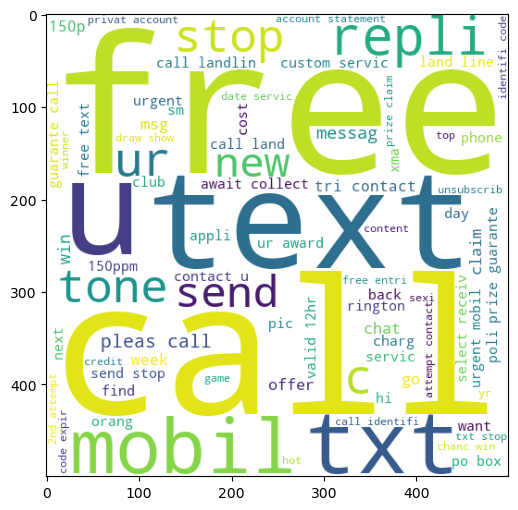

In [227]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

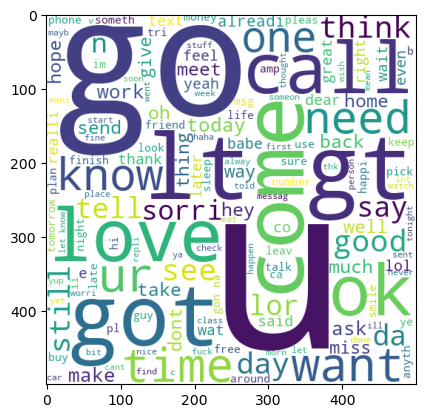

In [229]:
ham_wc = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [243]:
spam_corpus = []
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [244]:
len(spam_corpus)

9939

In [245]:
from collections import Counter

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

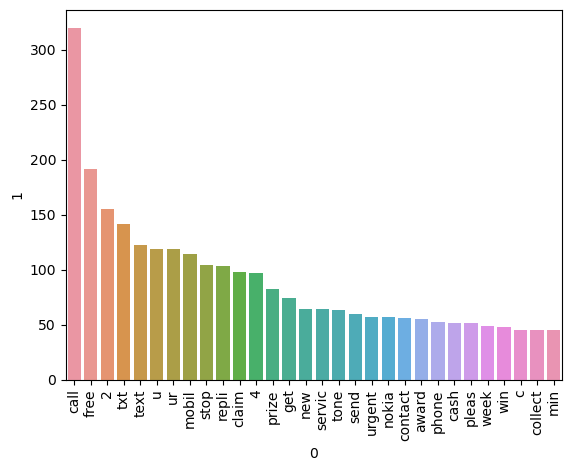

In [257]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

# 4.MODEL BUILDING

In [392]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [393]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [394]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [395]:
x.shape

(5169, 3000)

In [396]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [397]:
from sklearn.model_selection import train_test_split

In [398]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [399]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [400]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [401]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [402]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [403]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [405]:
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)
mnb = MultinomialNB()

In [406]:
clfs = {
    'LR':lrc,
    'RF':rfc,
    'xgb':xgb,
    'MNB':mnb
}

In [407]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [408]:
train_classifier(xgb,x_train,y_train,x_test,y_test)

(0.9671179883945842, 0.9262295081967213)

In [409]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213
For MNB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461


In [385]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [410]:
performance_df

,Algorithm,Accuracy,Precision
3,MNB,0.978723,0.946154
1,RF,0.975822,0.982906
0,LR,0.967118,0.964286
2,xgb,0.967118,0.926230


In [411]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [412]:
performance_df1

,Algorithm,variable,value
0,MNB,Accuracy,0.978723
1,RF,Accuracy,0.975822
2,LR,Accuracy,0.967118
3,xgb,Accuracy,0.967118
4,MNB,Precision,0.946154
5,RF,Precision,0.982906
6,LR,Precision,0.964286
7,xgb,Precision,0.926230


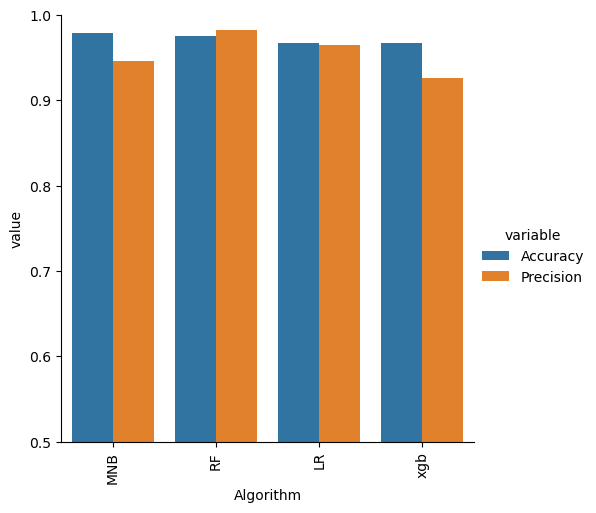

In [413]:
sns.catplot(x='Algorithm',y='value',hue = 'variable', data=performance_df1,kind = 'bar',height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [414]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))